In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE

In [2]:
df = pd.read_csv('Weather_Data.csv').set_index('date')

In [3]:
df.head()

,MeanTemp,MaxDewPt,MinDewPt,MaxPressure,MinPressure
date,,,,,
2016-05-04,34,12.0,-2.0,1009.0,1000.0
2016-05-05,31,13.0,0.0,1008.0,1001.0
2016-05-06,28,16.0,6.0,1011.0,1003.0
2016-05-07,30,17.0,9.0,1011.0,1004.0
2016-05-08,34,14.0,6.0,1010.0,1002.0


In [4]:
df.isnull().sum()

MeanTemp       0
MaxDewPt       0
MinDewPt       0
MaxPressure    0
MinPressure    0
dtype: int64

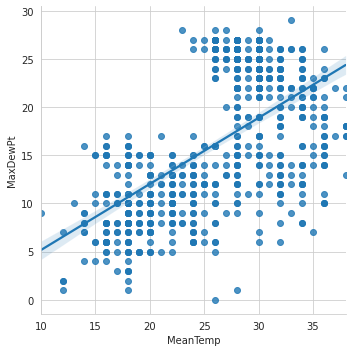

In [5]:
sns.set_style('whitegrid') 
sns.lmplot(x ='MeanTemp', y ='MaxDewPt', data = df)

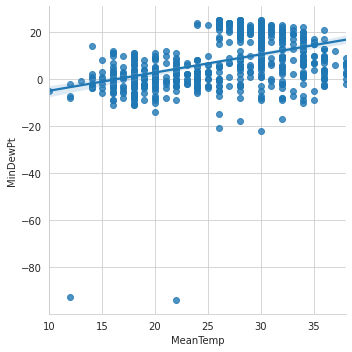

In [6]:
sns.set_style('whitegrid') 
sns.lmplot(x ='MeanTemp', y ='MinDewPt', data = df)

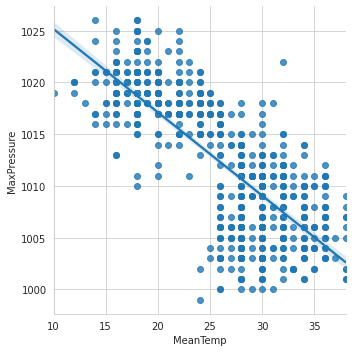

In [7]:
sns.set_style('whitegrid') 
sns.lmplot(x ='MeanTemp', y ='MaxPressure', data = df)

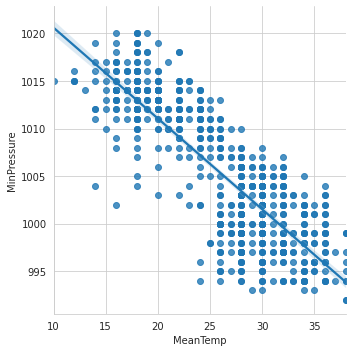

In [8]:
sns.set_style('whitegrid') 
sns.lmplot(x ='MeanTemp', y ='MinPressure', data = df)

In [9]:
x = df.iloc[:, 1:6]
y = df.iloc[:, :1]

In [10]:
x.head()

,MaxDewPt,MinDewPt,MaxPressure,MinPressure
date,,,,
2016-05-04,12.0,-2.0,1009.0,1000.0
2016-05-05,13.0,0.0,1008.0,1001.0
2016-05-06,16.0,6.0,1011.0,1003.0
2016-05-07,17.0,9.0,1011.0,1004.0
2016-05-08,14.0,6.0,1010.0,1002.0


In [11]:
y.head()

,MeanTemp
date,
2016-05-04,34
2016-05-05,31
2016-05-06,28
2016-05-07,30
2016-05-08,34


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle=True)

In [13]:
dt_reg = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 0.1, random_state = 3)
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3, splitter='best')

In [14]:
y_pred = dt_reg.predict(x_test)
mse_dt = MSE(y_test, y_pred)
rmse_dt = mse_dt**(1/2)
print(rmse_dt)

3.1402616907145733


In [15]:
score = dt_reg.score(x_test, y_test)
print(score)

0.7397049345487279


In [16]:
dt_reg.predict([[15.0, 4.0, 1010.0, 1005.0]])

array([29.6122449])